None
None
None
None
None
None


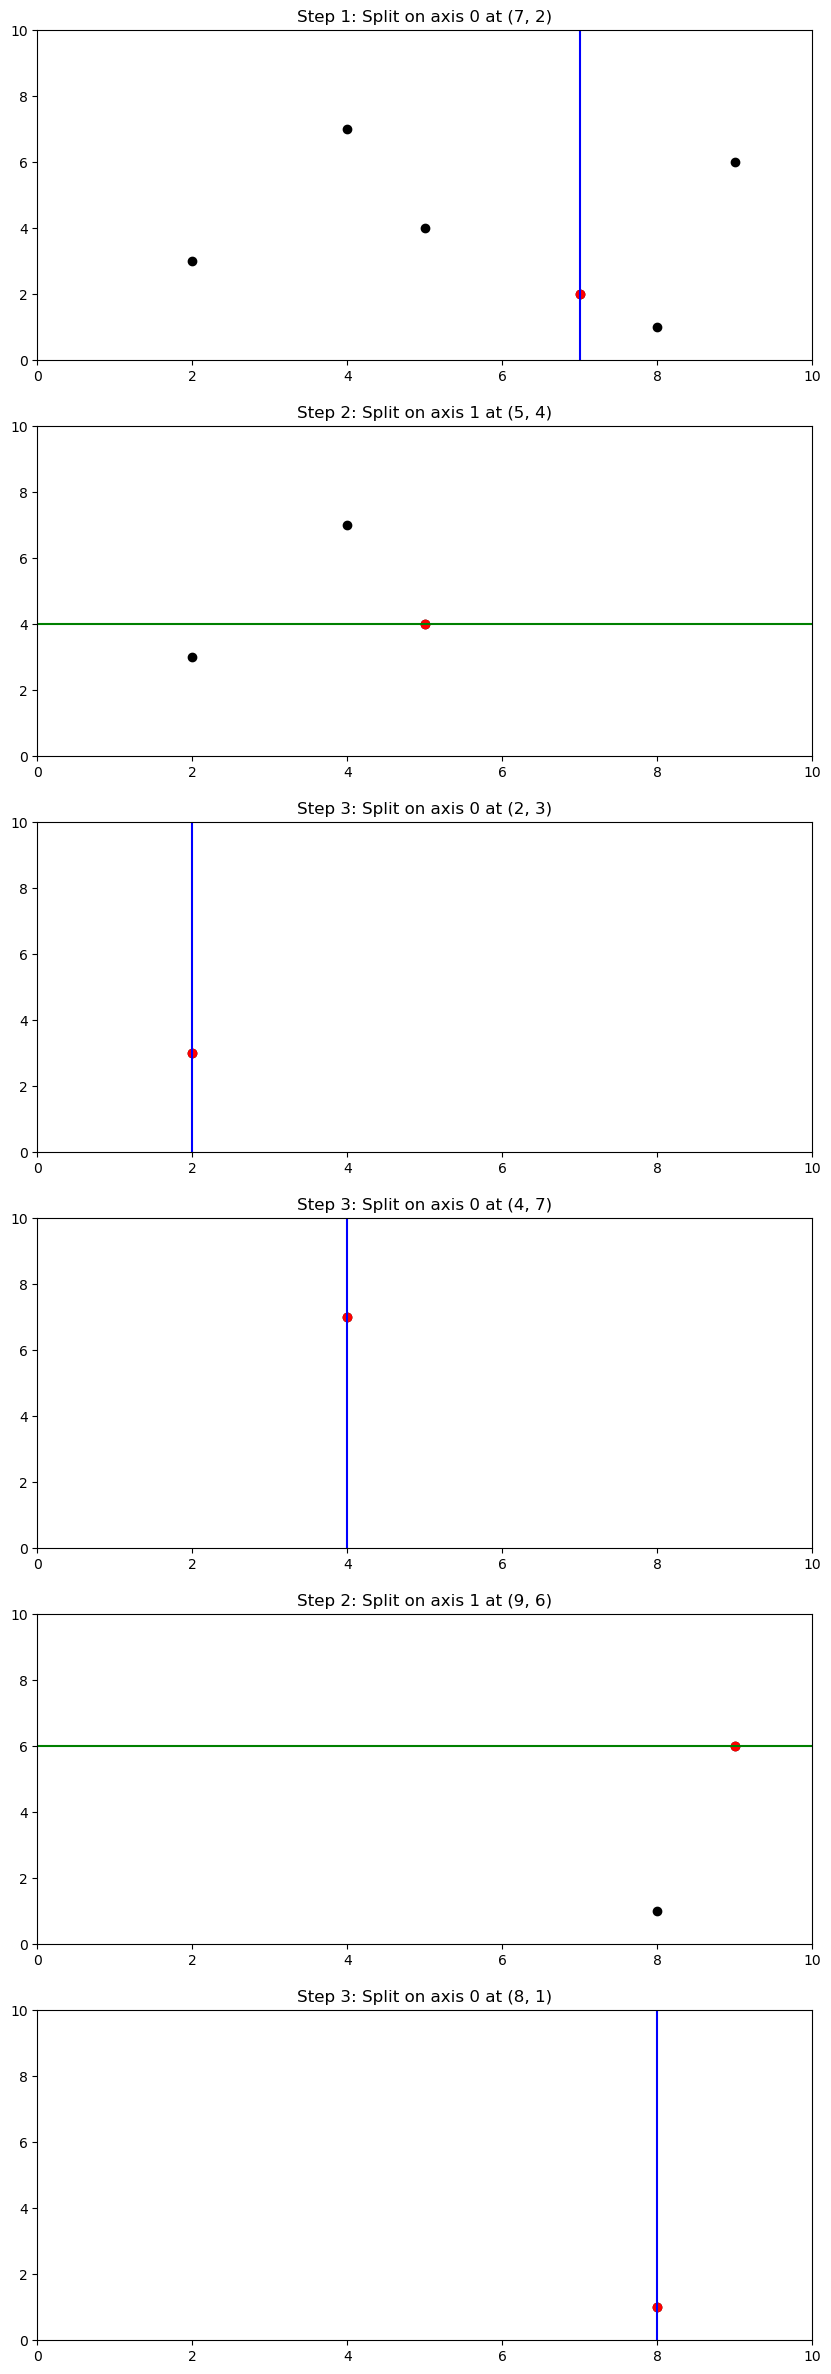

In [16]:
class KDNode:
    def __init__(self, point, axis, left=None, right=None):
        self.point = point  # The point stored at this node
        self.axis = axis  # The axis used to split (0 for x, 1 for y in 2D)
        self.left = left  # Left subtree
        self.right = right  # Right subtree

class KDTree:
    def __init__(self):
        self.root = None
        self.steps = []  # Steps to visualize the build process

    def build(self, points, depth=0):
        if not points:
            return None
        
        k = len(points[0])  # Dimensionality of the data
        axis = depth % k

        # Sort points by the current axis and choose the median as the pivot
        points.sort(key=lambda x: x[axis])
        median = len(points) // 2

        # Visualization step: capture the current state
        self.steps.append({
            'point': points[median],
            'axis': axis,
            'depth': depth,
            'points': list(points)  # Make a copy of the current points
        })

        return KDNode(
            point=points[median],
            axis=axis,
            left=self.build(points[:median], depth + 1),
            right=self.build(points[median + 1:], depth + 1)
        )

    def insert(self, point):
        def _insert_rec(node, point, depth=0):
            if node is None:
                k = len(point)
                return KDNode(point, depth % k)
            
            if point[node.axis] < node.point[node.axis]:
                node.left = _insert_rec(node.left, point, depth + 1)
            else:
                node.right = _insert_rec(node.right, point, depth + 1)
            
            return node

        self.root = _insert_rec(self.root, point)

# Function to visualize the KD-Tree building process
def plot_kdtree_build_step(step, ax):
    # Plot all points
    ax.scatter([p[0] for p in step['points']], [p[1] for p in step['points']], c='black')
    
    # Highlight the median point
    ax.scatter([step['point'][0]], [step['point'][1]], c='red')
    
    # Draw the dividing line
    if step['axis'] == 0:  # Vertical line
        ax.axvline(x=step['point'][0], color='blue')
    else:  # Horizontal line
        ax.axhline(y=step['point'][1], color='green')

    # Set the title to indicate the step
    ax.set_title(f"Step {step['depth']+1}: Split on axis {step['axis']} at {step['point']}")

    # Setting the axis limits
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

# Now let's build the tree and visualize each step
points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
kdtree = KDTree()
kdtree.build(points)

# Plot each step in the build process
fig, axs = plt.subplots(nrows=len(kdtree.steps), ncols=1, figsize=(10, len(kdtree.steps) * 5))
if len(kdtree.steps) == 1:  # If there's only one step, axs is not a list
    axs = [axs]
for i, step in enumerate(kdtree.steps):
    print(plot_kdtree_build_step(step, axs[i]))
# plt.tight_layout()
# plt.show()


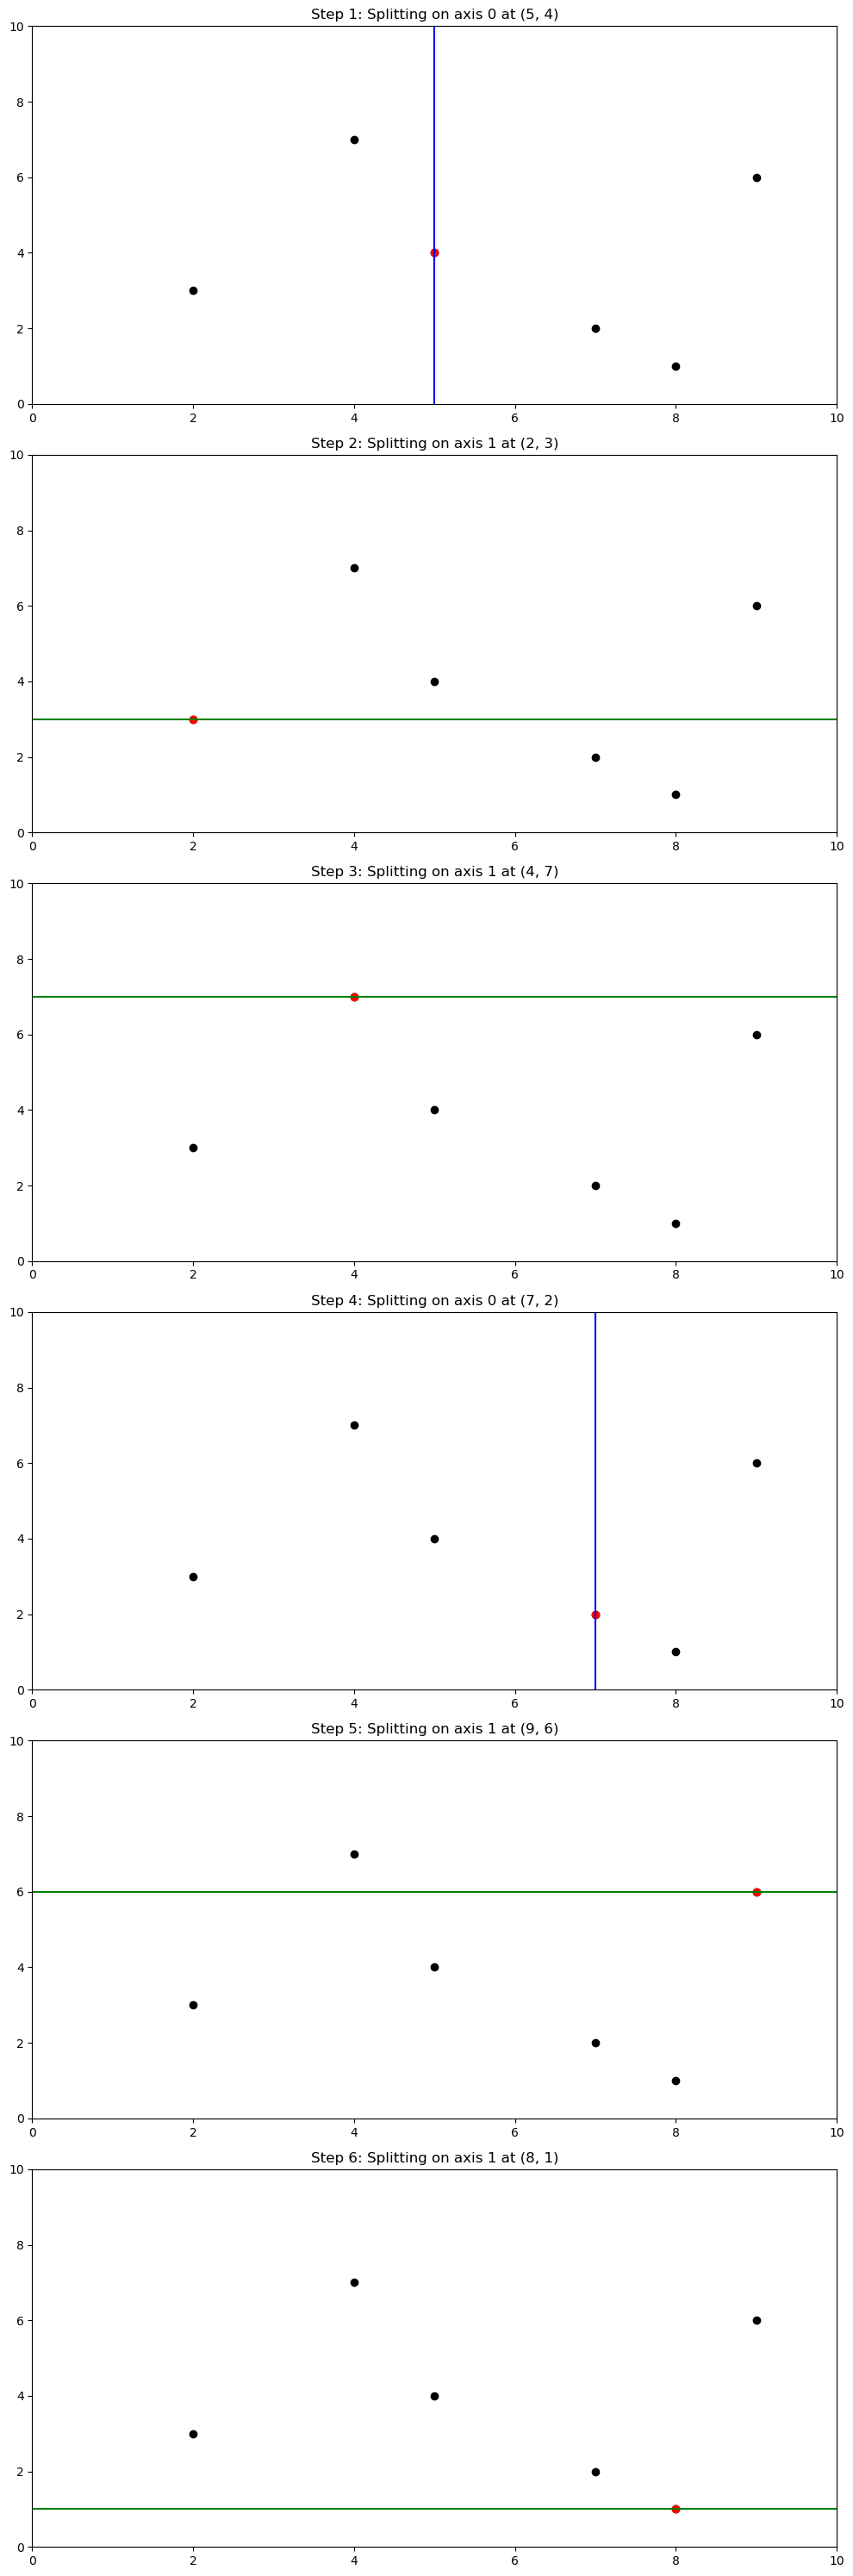

In [17]:
import matplotlib.pyplot as plt

# Assuming 2D points for visualization
points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]

# Helper function to visualize the KD-Tree building process
def visualize_kdtree_build(steps, points):
    fig, axs = plt.subplots(nrows=len(steps), ncols=1, figsize=(10, len(steps)*5))
    
    if len(steps) == 1:  # If there's only one step, axs is not a list
        axs = [axs]
    
    for i, step in enumerate(steps):
        # Plot all points
        axs[i].scatter([p[0] for p in points], [p[1] for p in points], c='black')

        # Highlight the pivot
        axs[i].scatter([step['point'][0]], [step['point'][1]], c='red')

        # Draw the line that represents the split
        if step['axis'] == 0:  # Vertical line
            axs[i].axvline(x=step['point'][0], color='blue')
        else:  # Horizontal line
            axs[i].axhline(y=step['point'][1], color='green')
        
        # Setting the axis limits
        axs[i].set_xlim(0, 10)
        axs[i].set_ylim(0, 10)
        axs[i].set_title(f"Step {i+1}: Splitting on axis {step['axis']} at {step['point']}")

    plt.tight_layout()
    plt.show()

# Mock-up of KDTree build steps (for visualization purposes)
# Normally, these would be generated during the KDTree build process
build_steps = [
    {'point': (5, 4), 'axis': 0},
    {'point': (2, 3), 'axis': 1},
    {'point': (4, 7), 'axis': 1},
    {'point': (7, 2), 'axis': 0},
    {'point': (9, 6), 'axis': 1},
    {'point': (8, 1), 'axis': 1},
]

# Visualize the build process
visualize_kdtree_build(build_steps, points)


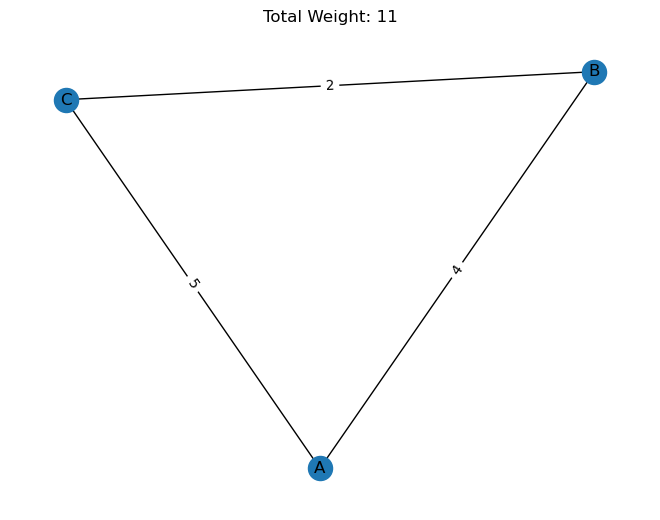

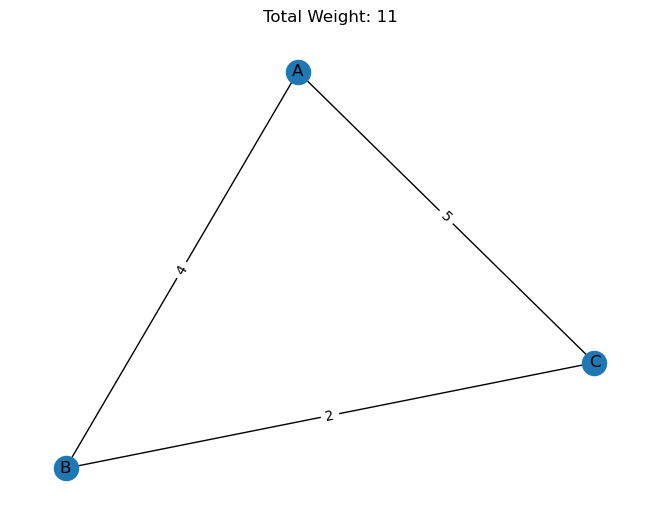

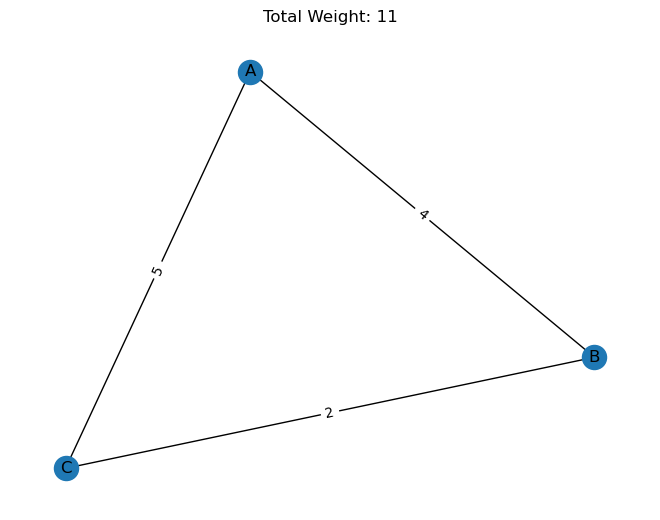

In [36]:
import networkx as nx
import matplotlib.pyplot as plt



# Draw the graph

# Calculate the total weight

# Add text to the plot with the total weight
# plt.text(0.1, 0.90, , 
#          horizontalalignment='center',
#          transform=plt.gca().transAxes)
for _ in range(3):
    # Create a new graph
    G = nx.Graph()

    # Add nodes and weighted edges
    G.add_edge('A', 'B', weight=4)
    G.add_edge('B', 'C', weight=2)
    G.add_edge('C', 'A', weight=5)
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    total_weight = sum(weight for _, _, weight in G.edges(data='weight'))
    plt.title(f'Total Weight: {total_weight}')
    plt2 = plt
# Show the graph with the text
    plt.draw()
    plt.show()


In [35]:
plt.show()

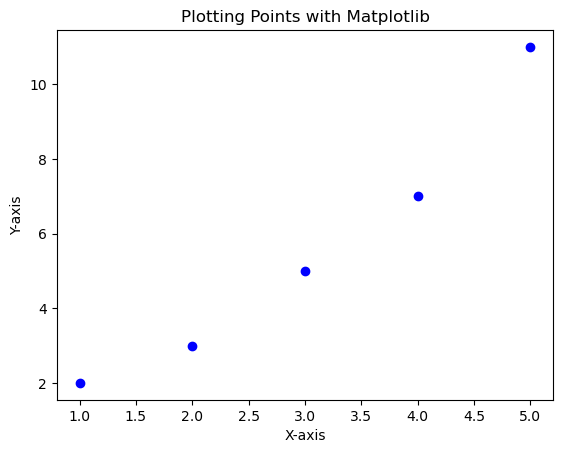

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for _ in range(3):
    # Data points
    x = [1, 2, 3, 4, 5]
    y = [2, 3, 5, 7, 11]

    # Create a new figure

    # Plot the points
    ax.scatter(x, y, color='blue', marker='o')

    # Customize the plot
    ax.set_title('Plotting Points with Matplotlib')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    # Draw the plot to the backend canvas
    plt.draw()

    # Now you can show the plot as many times as you want with plt.show()
    # Here we show it twice
    plt.show()
    plt.show()


In [28]:
plt.show()

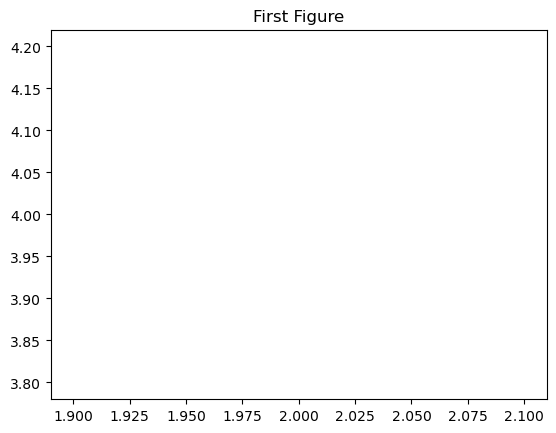

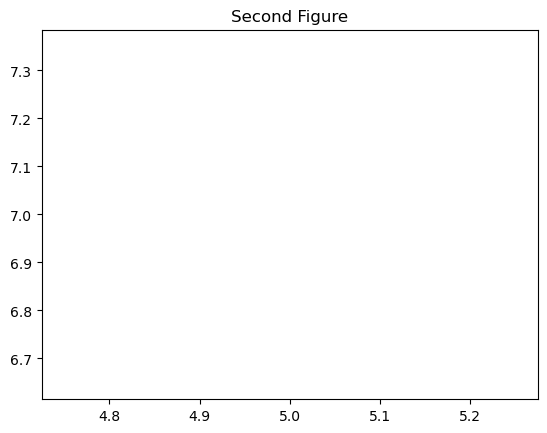

In [38]:
import matplotlib.pyplot as plt

# First plot
plt.figure(1)
plt.plot(2 ,4)
plt.title('First Figure')

# Second plot
plt.figure(2)
plt.plot(5 , 7)
plt.title('Second Figure')

# ... You can create more figures as needed

# Show all figures
plt.show()


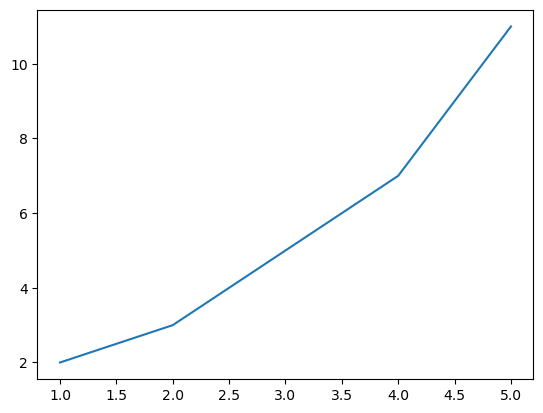

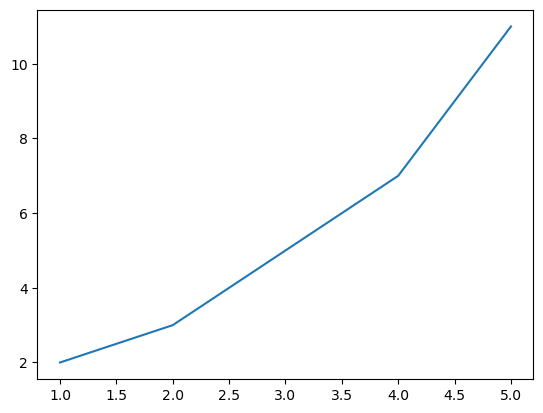

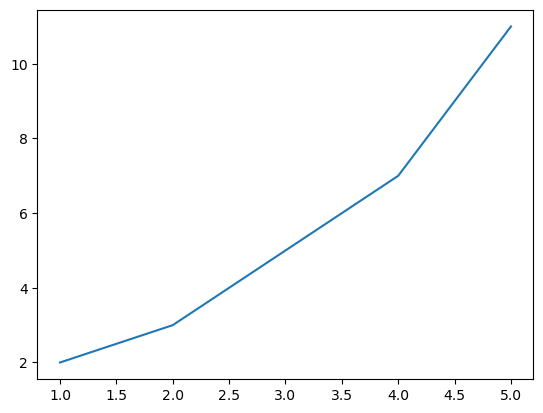

In [45]:
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# First figure
fig1, ax1 = plt.subplots()
ax1.plot(x, y)
y_limits = ax1.get_ylim()
fig1, ax1 = plt.subplots()
ax1.plot(x, y)
y_limits = ax1.get_ylim()
fig1, ax1 = plt.subplots()
ax1.plot(x, y)
y_limits = ax1.get_ylim()
# Let's say we want to reuse the y-axis limit from fig1 in fig2
# Let's say we want to reuse the y-axis limimpressionist-styleit from fig1 in fig2


# Now create a second figure
# fig1, ax1 = plt.subplots()
# # Reuse the same data
# ax1.plot(x, y)

# # Set the y-axis limits of the second figure to match the first
# ax1.set_ylim(y_limits)

# # Show both plots
plt.show()


/tmp/ipykernel_3570/4139441091.py:22: RuntimeWarning: overflow encountered in exp
  plt.semilogy(k_values, np.exp(log_n_values), marker='o')  # semilogy for log scale on y-axis
/tmp/ipykernel_3570/4139441091.py:26: RuntimeWarning: overflow encountered in exp
  plt.text(k, np.exp(log_n), f"({k},{np.exp(log_n):.1e})")
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


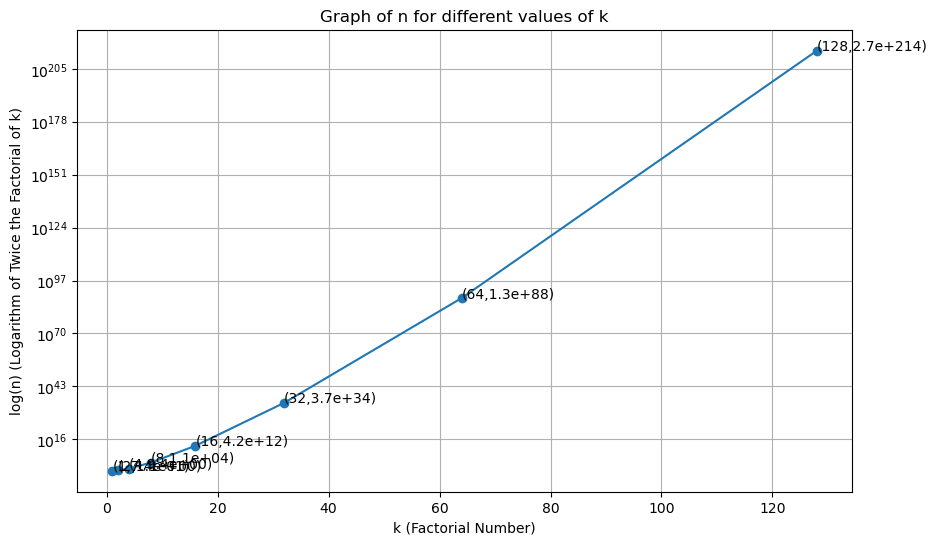

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np

# Assuming you want to create a sequence up to 2^10 (inclusive)
n = 10
start_power = 0  # 2^0 is 1
stop_power = n  # You want to go up to 2^n

# Create the sequence
k_values = sequence = np.logspace(start_power, stop_power, num=stop_power-start_power+1, base=2, dtype=int)


# Define the range of k values
# k_values = np.arange(1, 150 , 30)  # Arbitrary choice for demonstration; adjust as needed.

# Compute the logarithm of n values using Stirling's approximation for log(k!)
log_n_values = np.log(2) + (k_values * np.log(k_values) - k_values)

# Plotting the graph with a logarithmic scale
plt.figure(figsize=(10, 6))
plt.semilogy(k_values, np.exp(log_n_values), marker='o')  # semilogy for log scale on y-axis

# Annotating the graph with (k, log(n)) points
for k, log_n in zip(k_values, log_n_values):
    plt.text(k, np.exp(log_n), f"({k},{np.exp(log_n):.1e})")

plt.title('Graph of n for different values of k')
plt.xlabel('k (Factorial Number)')
plt.ylabel('log(n) (Logarithm of Twice the Factorial of k)')
plt.grid(True)
plt.show()


/tmp/ipykernel_3570/840282317.py:7: RuntimeWarning: overflow encountered in scalar power
  return math.sqrt(2 * math.pi * k) * (k / math.e)**k


TypeError: LogScale.__init__() got an unexpected keyword argument 'basex'

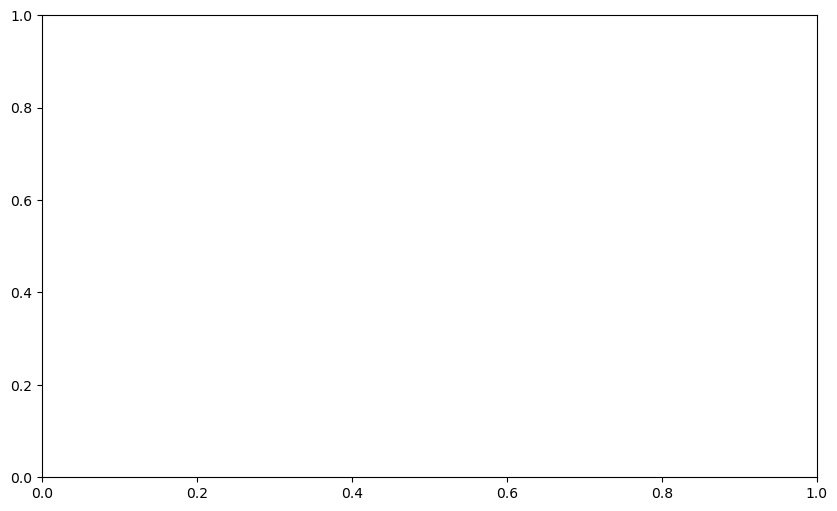

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the Stirling's approximation function
def stirling_approximation(k):
    return math.sqrt(2 * math.pi * k) * (k / math.e)**k

# Generate k values as powers of 2
k_values = np.array([2**i for i in range(1, 21)])  # Going up to 2^20

# Calculate n values using the Stirling's approximation
n_values = [stirling_approximation(k) * 2 for k in k_values]

# Since we want n as a power of 10, let's convert n to its logarithm base 10 equivalent
n_values_log10 = [math.log10(n_val) for n_val in n_values]

# Plotting the data using a log scale for the y-axis with base 10
plt.figure(figsize=(10, 6))
plt.semilogx(k_values, n_values_log10, 'o-', basex=2)  # semilogx for log scale on x-axis only

# Annotating the graph with (k, n) points
for k, n_log10 in zip(k_values, n_values_log10):
    plt.text(k, n_log10, f"({k},{10**n_log10:.1e})")

plt.title('Graph of log10(n) = Stirling\'s Approximation of factorial(k) for k as powers of 2')
plt.xlabel('k (as powers of 2)')
plt.ylabel('log10(n)')
plt.grid(True, which="both", ls="--")
plt.show()


/tmp/ipykernel_3570/954912136.py:7: RuntimeWarning: overflow encountered in scalar power
  return math.sqrt(2 * math.pi * k) * (k / math.e)**k
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should 

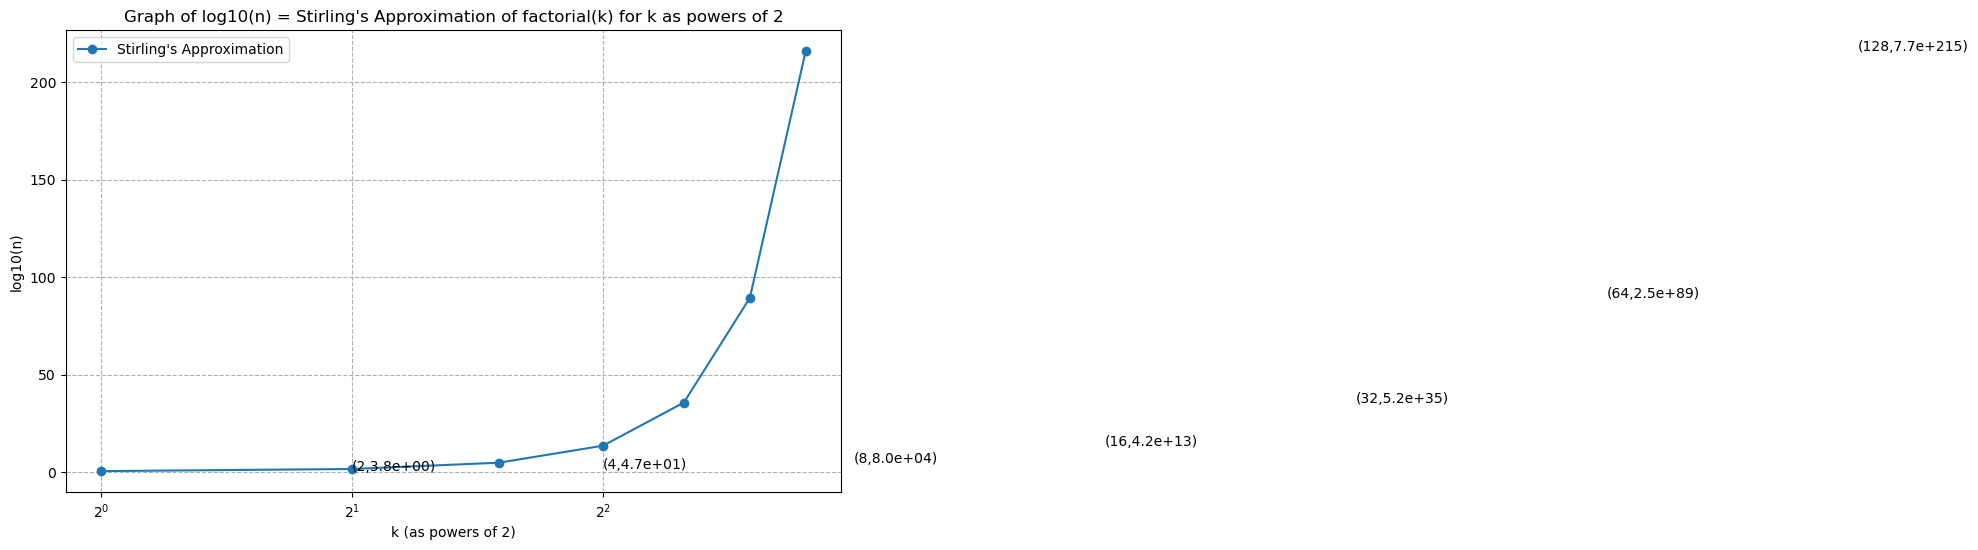

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the Stirling's approximation function
def stirling_approximation(k):
    return math.sqrt(2 * math.pi * k) * (k / math.e)**k

# Generate k values as powers of 2
k_values = np.array([2**i for i in range(1, 21)])  # Going up to 2^20

# Calculate n values using the Stirling's approximation
n_values = [stirling_approximation(k) * 2 for k in k_values]

# Convert n to its logarithm base 10 equivalent
n_values_log10 = [math.log10(n_val) for n_val in n_values]
kv = np.array([i for i in range(1, 21)])
# Plotting the data using a logarithmic scale on the x-axis with base 2
plt.figure(figsize=(10, 6))
# plt.plot(k_values, n_values_log10, 'o-', label='Stirling\'s Approximation')
plt.plot(k_values, n_values_log10, 'o-', label='Stirling\'s Approximation')

# Configure the x-axis to a log scale with base 2
plt.xscale('log', base=2)

# Annotating the graph with (k, log10(n)) points
for k, n_log10 in zip(k_values, n_values_log10):
    plt.text(k, n_log10, f'({k},{10**n_log10:.1e})')

plt.title('Graph of log10(n) = Stirling\'s Approximation of factorial(k) for k as powers of 2')
plt.xlabel('k (as powers of 2)')
plt.ylabel('log10(n)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()
